#  **E-Commerce Data Analysis**


## **Objective**
  This project focuses on performing a complete end-to-end data analysis using real-world e-commerce datasets to uncover insights related to
*  customer purchasing trends
*  order patterns
*  revenue performance
*  product returns

## **Data Understanding**

In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Reading all Files
Orders_df=pd.read_csv('/content/orders.csv')
Customers_df=pd.read_csv('/content/customers.csv')
Products_df=pd.read_csv('/content/products.csv')
Returns_df=pd.read_csv('returns.csv')

In [ ]:
# checking the orders file
Orders_df.head()


,Order_ID,Order_Date,Customer_ID,Product_ID,Quantity,Unit_Price,Total_Amount,Payment_Method,Order_Status,Return_Flag
0,ORD10000,2023-04-18,CUST1127,PROD229,4,464,1856,FPX,Delivered,No
1,ORD10001,2023-10-03,CUST1460,PROD350,1,1364,1364,Credit Card,Delivered,No
2,ORD10002,2023-06-29,CUST861,PROD275,1,1126,1126,Cash on Delivery,Delivered,No
3,ORD10003,2023-10-20,CUST1295,PROD442,4,1477,5908,FPX,Delivered,No
4,ORD10004,2024-08-06,CUST1131,PROD279,2,36,72,FPX,Returned,Yes


In [ ]:
# checking the customers file
Customers_df.head()


,Customer_ID,Customer_Name,Gender,Age,State,Signup_Date,Loyalty_Segment
0,CUST1127,Customer_1,Male,30,Johor,2022-01-28,New
1,CUST1460,Customer_2,Female,45,Penang,2022-07-23,Regular
2,CUST861,Customer_3,Female,31,Pahang,2022-11-09,VIP
3,CUST1295,Customer_4,Male,20,Sarawak,2022-12-31,Regular
4,CUST1131,Customer_5,Male,33,Pahang,2022-02-06,Regular


In [ ]:
# checking the Products file
Products_df.tail()


,Product_ID,Product_Category,Product_Name,Brand
495,PROD113,Fashion,Product_770,Samsung
496,PROD345,Home,Product_20,Xiaomi
497,PROD23,Home,Product_249,Xiaomi
498,PROD54,Home,Product_355,Sony
499,PROD370,Fashion,Product_162,L'Oréal


In [ ]:
# checking the Returns file
Returns_df.head()

,Return_ID,Order_ID,Return_Reason,Total_Amount
0,RET00001,ORD10004,Late delivery,72
1,RET00002,ORD10008,Changed mind,602
2,RET00003,ORD10010,Defective,950
3,RET00004,ORD10011,Late delivery,2648
4,RET00005,ORD10017,Wrong size,718


## **Exploratory Data Analysis(EDA)**


### **1)Orders Data**

In [ ]:
# Orders Dataset info to get the information like (Column types, Non-null counts, Dtype,Index,memory usage)
print("Dataset Information:")
print(Orders_df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order_ID        10000 non-null  object
 1   Order_Date      10000 non-null  object
 2   Customer_ID     10000 non-null  object
 3   Product_ID      10000 non-null  object
 4   Quantity        10000 non-null  int64 
 5   Unit_Price      10000 non-null  int64 
 6   Total_Amount    10000 non-null  int64 
 7   Payment_Method  10000 non-null  object
 8   Order_Status    10000 non-null  object
 9   Return_Flag     10000 non-null  object
dtypes: int64(3), object(7)
memory usage: 781.4+ KB
None


In [ ]:
# Dataset shape - to view the number of Rows and Columns
print("\nDataset Shape:")
print(Orders_df.shape)


Dataset Shape:
(10000, 10)


In [ ]:
# Check for missing values
print("Missing Values in Each Column:")
print(Orders_df.isnull().sum())

Missing Values in Each Column:
Order_ID          0
Order_Date        0
Customer_ID       0
Product_ID        0
Quantity          0
Unit_Price        0
Total_Amount      0
Payment_Method    0
Order_Status      0
Return_Flag       0
dtype: int64


In [ ]:
# Describe the Summary -statistics for numerical columns
print("Summary Statistics:")
print(Orders_df.describe())

Summary Statistics:
           Quantity   Unit_Price  Total_Amount
count  10000.000000  10000.00000  10000.000000
mean       2.501500    760.70260   1902.882900
std        1.128772    426.12037   1444.995845
min        1.000000     20.00000     20.000000
25%        1.000000    391.00000    743.750000
50%        3.000000    761.00000   1459.500000
75%        4.000000   1126.00000   2801.000000
max        4.000000   1499.00000   5996.000000


In [ ]:
#  Describe the Summary -statistics for categorical columns
print("Categorical Feature Summary:")
print(Orders_df.describe(include=['object']))

Categorical Feature Summary:
        Order_ID  Order_Date Customer_ID Product_ID Payment_Method  \
count      10000       10000       10000      10000          10000   
unique     10000         680        1987        500              4   
top     ORD19983  2023-04-22    CUST1953    PROD464    Credit Card   
freq           1          29          14         34           2603   

       Order_Status Return_Flag  
count         10000       10000  
unique            3           2  
top       Delivered          No  
freq           7982        8514  


In [ ]:
# To find Unique values in each column
print("Unique Values Per Column: ")
for col in Orders_df.columns:
    print(f"{col}:      {Orders_df[col].nunique()} unique values")

Unique Values Per Column: 
Order_ID:      10000 unique values
Order_Date:      680 unique values
Customer_ID:      1987 unique values
Product_ID:      500 unique values
Quantity:      4 unique values
Unit_Price:      1479 unique values
Total_Amount:      3205 unique values
Payment_Method:      4 unique values
Order_Status:      3 unique values
Return_Flag:      2 unique values


In [ ]:
# To Check for duplicate rows
print("Number of Duplicate Rows:")
print(Orders_df.duplicated().sum())

Number of Duplicate Rows:
0


### **Data Distribution of Orders Data**

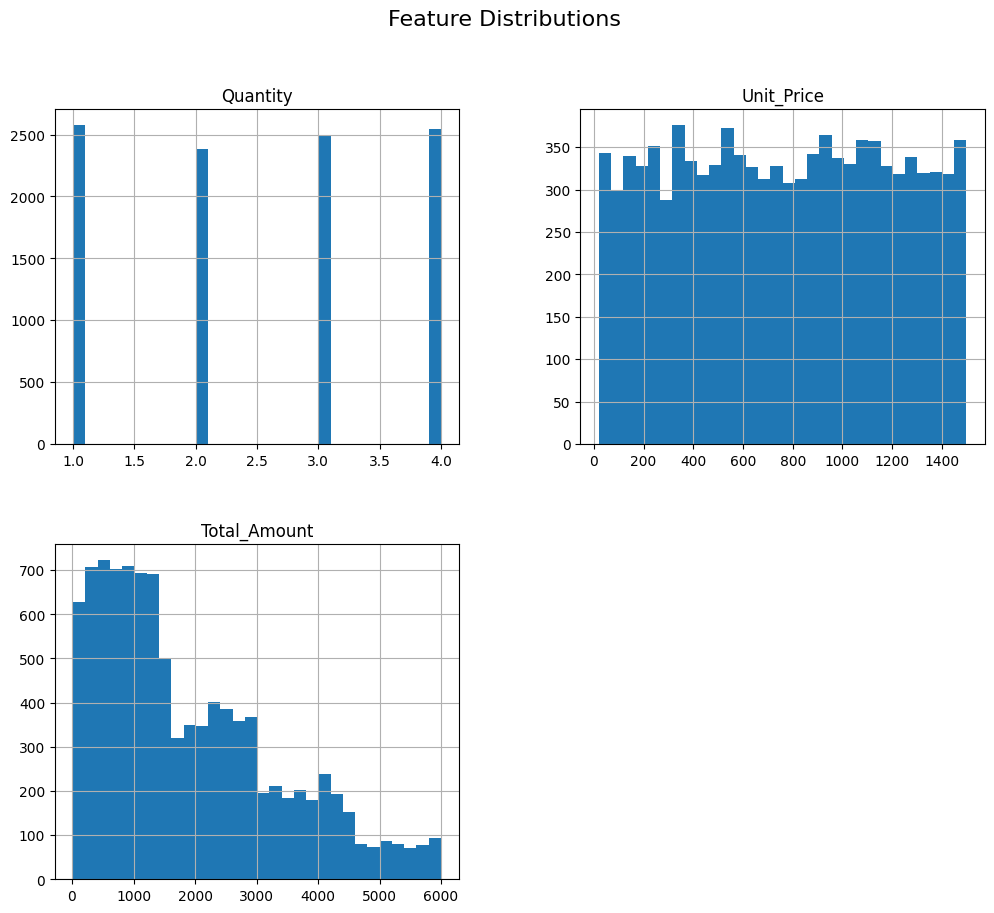

In [ ]:
# Histogram for numerical columns- to see the distribution of data
Orders_df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

### **Data Cleaning of Orders Data**

In [ ]:
# Type Casting Oder_Date column from object type to DateTime type
Orders_df['Order_Date']=pd.to_datetime(Orders_df['Order_Date'])
print(Orders_df.dtypes)


Order_ID                  object
Order_Date        datetime64[ns]
Customer_ID               object
Product_ID                object
Quantity                   int64
Unit_Price                 int64
Total_Amount               int64
Payment_Method            object
Order_Status              object
Return_Flag               object
dtype: object


### **2) Customers Data**

In [ ]:
# Customers Dataset info to get the information like (Column types, Non-null counts, Dtype,Index,memory usage)
print("Dataset Information:")
print(Customers_df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer_ID      1987 non-null   object
 1   Customer_Name    1987 non-null   object
 2   Gender           1987 non-null   object
 3   Age              1987 non-null   int64 
 4   State            1987 non-null   object
 5   Signup_Date      1987 non-null   object
 6   Loyalty_Segment  1987 non-null   object
dtypes: int64(1), object(6)
memory usage: 108.8+ KB
None


In [ ]:
# Dataset shape - to view the number of Rows and Columns
print("\nDataset Shape:")
print(Customers_df.shape)


Dataset Shape:
(1987, 7)


In [ ]:
# Check for missing values
print("Missing Values in Each Column:")
print(Customers_df.isnull().sum())

Missing Values in Each Column:
Customer_ID        0
Customer_Name      0
Gender             0
Age                0
State              0
Signup_Date        0
Loyalty_Segment    0
dtype: int64


In [ ]:
# Describe the Summary -statistics for numerical columns
print("Summary Statistics:")
print(Customers_df.describe())

Summary Statistics:
               Age
count  1987.000000
mean     38.379467
std      11.950929
min      18.000000
25%      28.000000
50%      38.000000
75%      49.000000
max      59.000000


In [ ]:
#  Describe the Summary -statistics for categorical columns
print("Categorical Feature Summary:")
print(Customers_df.describe(include=['object']))

Categorical Feature Summary:
       Customer_ID  Customer_Name  Gender    State Signup_Date Loyalty_Segment
count         1987           1987    1987     1987        1987            1987
unique        1987           1987       2       10         683               3
top       CUST1262  Customer_9822  Female  Sarawak  2022-02-10         Regular
freq             1              1    1030      221           9             862


In [ ]:
# To find Unique values in each column
print("Unique Values Per Column: ")
for col in Customers_df.columns:
    print(f"{col}:      {Customers_df[col].nunique()} unique values")

Unique Values Per Column: 
Customer_ID:      1987 unique values
Customer_Name:      1987 unique values
Gender:      2 unique values
Age:      42 unique values
State:      10 unique values
Signup_Date:      683 unique values
Loyalty_Segment:      3 unique values


In [ ]:
# To Check for duplicate rows
print("Number of Duplicate Rows:")
print(Orders_df.duplicated().sum())

Number of Duplicate Rows:
0


### **Data Distribution of Customers Data**

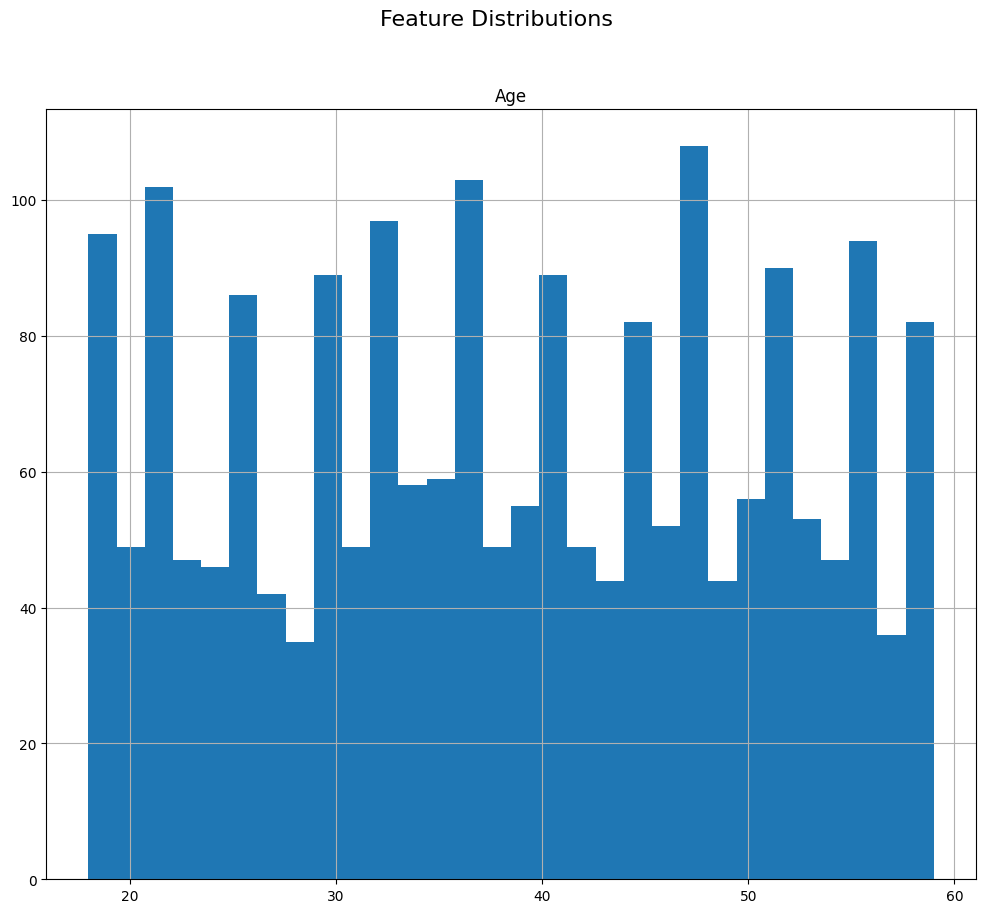

In [ ]:
# Histogram for numerical columns- to see the distribution of data
Customers_df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

### **Data cleaning of Customers data**

In [ ]:
# Type cating Signup Date from object to Date Time
Customers_df['Signup_Date']=pd.to_datetime(Customers_df['Signup_Date'])
print(Customers_df.dtypes)

Customer_ID                object
Customer_Name              object
Gender                     object
Age                         int64
State                      object
Signup_Date        datetime64[ns]
Loyalty_Segment            object
dtype: object


### **3) Products Data**

In [ ]:
# Products Dataset info to get the information like (Column types, Non-null counts, Dtype,Index,memory usage)
print("Dataset Information:")
print(Products_df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        500 non-null    object
 1   Product_Category  500 non-null    object
 2   Product_Name      500 non-null    object
 3   Brand             500 non-null    object
dtypes: object(4)
memory usage: 15.8+ KB
None


In [ ]:
# Dataset shape - to view the number of Rows and Columns
print("\nDataset Shape:")
print(Products_df.shape)


Dataset Shape:
(500, 4)


In [ ]:
# Check for missing values
print("Missing Values in Each Column:")
print(Products_df.isnull().sum())

Missing Values in Each Column:
Product_ID          0
Product_Category    0
Product_Name        0
Brand               0
dtype: int64


In [ ]:
# Describe the Summary columns
print("Summary Statistics:")
print(Products_df.describe())

Summary Statistics:
       Product_ID Product_Category Product_Name    Brand
count         500              500          500      500
unique        500                5          384       10
top       PROD370             Home  Product_643  Samsung
freq            1              115            4       71


In [ ]:
#  Describe the Summary -statistics for categorical columns
print("Categorical Feature Summary:")
print(Products_df.describe(include=['object']))

Categorical Feature Summary:
       Product_ID Product_Category Product_Name    Brand
count         500              500          500      500
unique        500                5          384       10
top       PROD370             Home  Product_643  Samsung
freq            1              115            4       71


Here as it dont have numerical columns it gives same result for both the code.

In [ ]:
# To find Unique values in each column
print("Unique Values Per Column: ")
for col in Products_df.columns:
    print(f"{col}:      {Products_df[col].nunique()} unique values")

Unique Values Per Column: 
Product_ID:      500 unique values
Product_Category:      5 unique values
Product_Name:      384 unique values
Brand:      10 unique values


In [ ]:
# To Check for duplicate rows
print("Number of Duplicate Rows:")
print(Products_df.duplicated().sum())

Number of Duplicate Rows:
0


### **Data Distribution of Products Data**

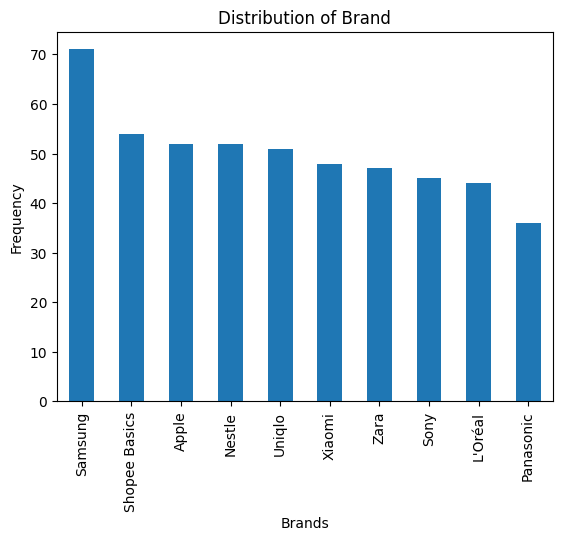

In [ ]:
# Plot a bar chart
value_counts = Products_df['Brand'].value_counts()
value_counts.plot(kind='bar')
plt.title(f'Distribution of Brand')
plt.xlabel('Brands')
plt.ylabel('Frequency')
plt.show()

### **4)Returns Data**

In [ ]:
# Orders Dataset info to get the information like (Column types, Non-null counts, Dtype,Index,memory usage)
print("Dataset Information:")
print(Returns_df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Return_ID      1486 non-null   object
 1   Order_ID       1486 non-null   object
 2   Return_Reason  1234 non-null   object
 3   Total_Amount   1486 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.6+ KB
None


In [ ]:
# Dataset shape - to view the number of Rows and Columns
print("\nDataset Shape:")
print(Returns_df.shape)


Dataset Shape:
(1486, 4)


In [ ]:
# Check for missing values
print("Missing Values in Each Column:")
print(Returns_df.isnull().sum())

Missing Values in Each Column:
Return_ID          0
Order_ID           0
Return_Reason    252
Total_Amount       0
dtype: int64


In [ ]:
# Describe the Summary for numerical columns
print("Summary Statistics:")
print(Returns_df.describe())

Summary Statistics:
       Total_Amount
count   1486.000000
mean    1877.431359
std     1400.371237
min       27.000000
25%      724.500000
50%     1452.500000
75%     2771.000000
max     5992.000000


In [ ]:
#  Describe the Summary -statistics for categorical columns
print("Categorical Feature Summary:")
print(Returns_df.describe(include=['object']))

Categorical Feature Summary:
       Return_ID  Order_ID Return_Reason
count       1486      1486          1234
unique      1486      1486             5
top     RET01486  ORD19990  Changed mind
freq           1         1           280


In [ ]:
# To find Unique values in each column
print("Unique Values Per Column: ")
for col in Returns_df.columns:
    print(f"{col}:      {Returns_df[col].nunique()} unique values")

Unique Values Per Column: 
Return_ID:      1486 unique values
Order_ID:      1486 unique values
Return_Reason:      5 unique values
Total_Amount:      1169 unique values


In [ ]:
# To Check for duplicate rows
print("Number of Duplicate Rows:")
print(Returns_df.duplicated().sum())

Number of Duplicate Rows:
0


### **Data Distribution of Returns data**

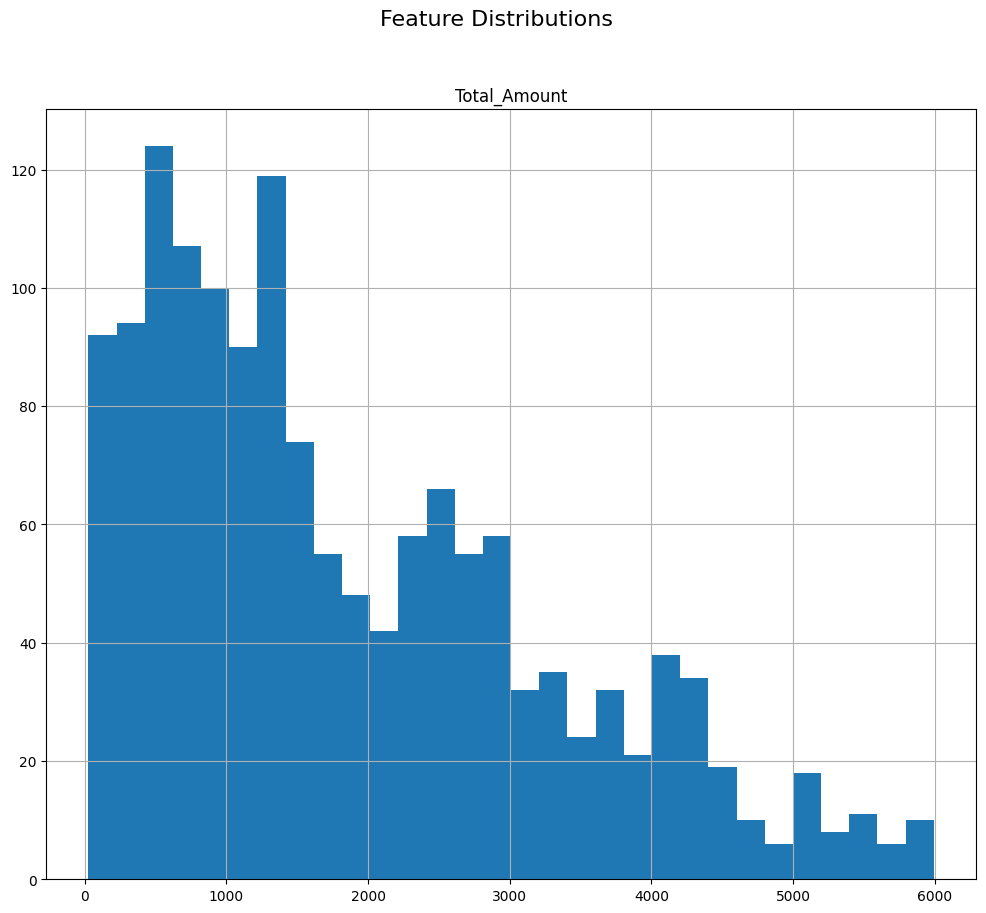

In [ ]:
# Histogram for numerical columns- to see the distribution of data
Returns_df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

## **Analysis**

In [61]:
# Merging all the data together
df = Orders_df.merge(Customers_df, on="Customer_ID", how="left") \
           .merge(Products_df, on="Product_ID", how="left") \
           .merge(Returns_df, on="Order_ID", how="left")

df.head()

,Order_ID,Order_Date,Customer_ID,Product_ID,Quantity,Unit_Price,Total_Amount_x,Payment_Method,Order_Status,Return_Flag,...,Age,State,Signup_Date,Loyalty_Segment,Product_Category,Product_Name,Brand,Return_ID,Return_Reason,Total_Amount_y
0,ORD10000,2023-04-18,CUST1127,PROD229,4,464,1856,FPX,Delivered,No,...,30,Johor,2022-01-28,New,Beauty,Product_449,Shopee Basics,NaN,NaN,NaN
1,ORD10001,2023-10-03,CUST1460,PROD350,1,1364,1364,Credit Card,Delivered,No,...,45,Penang,2022-07-23,Regular,Home,Product_203,Samsung,NaN,NaN,NaN
2,ORD10002,2023-06-29,CUST861,PROD275,1,1126,1126,Cash on Delivery,Delivered,No,...,31,Pahang,2022-11-09,VIP,Fashion,Product_41,Shopee Basics,NaN,NaN,NaN
3,ORD10003,2023-10-20,CUST1295,PROD442,4,1477,5908,FPX,Delivered,No,...,20,Sarawak,2022-12-31,Regular,Electronics,Product_4,Zara,NaN,NaN,NaN
4,ORD10004,2024-08-06,CUST1131,PROD279,2,36,72,FPX,Returned,Yes,...,33,Pahang,2022-02-06,Regular,Electronics,Product_293,Uniqlo,RET00001,Late delivery,72.0


In [65]:
# Revenue by Category
df.groupby('Product_Category')['Total_Amount_x'].sum().sort_values(ascending=False)

,Total_Amount_x
Product_Category,
Home,4217418
Groceries,3806424
Beauty,3752923
Electronics,3681326
Fashion,3570738


In [68]:
#Orders per Customer (Customer Frequency)
orders_per_customer = df.groupby('Customer_ID')['Order_ID'].nunique()
orders_per_customer.describe()

,Order_ID
count,1987.000000
mean,5.032713
std,2.257010
min,1.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,14.000000


In [79]:
# Daily Orders
daily_orders = Orders_df.groupby('Order_Date')['Order_ID'].count()
print(daily_orders)

Order_Date
2023-01-01    18
2023-01-02    12
2023-01-03    11
2023-01-04    10
2023-01-05    15
              ..
2024-11-06    14
2024-11-07     9
2024-11-08    19
2024-11-09    17
2024-11-10    12
Name: Order_ID, Length: 680, dtype: int64


In [82]:
# Revenue Trend
daily_revenue = df.groupby('Order_Date')['Total_Amount_x'].sum()
print(daily_revenue)

Order_Date
2023-01-01    47323
2023-01-02    31059
2023-01-03    14800
2023-01-04    23835
2023-01-05    27702
              ...  
2024-11-06    33663
2024-11-07    19158
2024-11-08    32735
2024-11-09    28990
2024-11-10    27851
Name: Total_Amount_x, Length: 680, dtype: int64


## **Conclusion**

This dataset shows stable order activity with moderate sales across categories. Revenue is mainly driven by Electronics and Beauty items, although these categories also show slightly higher return behavior. No significant data quality issues or unusual patterns were observed in the distributions.